In [2]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

KOI_raw_data = pd.read_csv('Data/KOI_data_cumulative_2025.09.22_07.28.01.csv',skiprows=144)

useless_columns_KOI = [
    'kepid', 'rowid', 'koi_datalink_dvr', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
    'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_parm_prov', 'koi_sparprov',
    'koi_vet_stat', 'koi_vet_date', 'koi_comment', 'koi_tce_delivname', 'koi_tce_plnt_num', 'ra', 'dec',
    'koi_quarters', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1',
    'koi_time0_err2', 'koi_limbdark_mod', 'koi_fittype', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec',
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
    'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 'koi_dikco_msky_err', 'koi_fwm_stat_sig', 'koi_fwm_sra',
    'koi_fwm_sra_err', 'koi_fwm_sdec', 'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco',
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 'koi_fwm_pdeco_err', 'koi_period_err1',
    'koi_period_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress_err1', 'koi_ingress_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho_err1', 'koi_srho_err2',
    'koi_prad_err1', 'koi_prad_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1',
    'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_dor_err1', 'koi_dor_err2', 'koi_steff_err1',
    'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad_err1',
    'koi_srad_err2', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage_err1', 'koi_sage_err2', 'koi_sage', 'koi_model_dof',
    'koi_ingress', 'koi_model_chisq', 'koi_longp', 'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_trans_mod', 'koi_datalink_dvr',
    'koi_datalink_dvs'
]

useful_columns_KOI = [
    'koi_period', 'koi_duration', 'koi_depth', 'koi_model_snr', 'koi_impact', 'koi_ror', 'koi_prad', 'koi_sma',
    'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_smet', 'koi_smass', 'koi_srho', 'koi_kepmag',
    'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_incl', 'koi_dor',
]

In [3]:
df_KOI = KOI_raw_data.drop(columns=useless_columns_KOI)
df_KOI

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,CONFIRMED,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,...,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,CONFIRMED,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,...,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
2,CANDIDATE,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,...,0.868,0.961,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826
3,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,...,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,CONFIRMED,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,...,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,0.297633,0.16318,29.35,0.0128,20.78,...,0.903,1.005,14.082,14.082,13.501,13.299,13.177,12.200,11.814,11.756
9560,CANDIDATE,1.739849,0.043,3.11400,48.5,0.006379,0.50770,0.72,0.0290,89.42,...,1.031,1.075,14.757,15.189,14.687,14.571,14.484,13.641,13.339,13.261
9561,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,0.009444,8.97692,1.07,0.0157,88.60,...,1.041,1.104,15.385,15.853,15.347,15.185,15.158,14.220,13.913,13.844
9562,CANDIDATE,333.486169,0.214,3.19900,639.1,0.022590,85.88623,19.30,1.2233,89.98,...,7.824,2.190,10.998,11.733,10.880,10.682,10.578,9.501,9.027,8.921


In [4]:
# Convert into dummies the categorical target
original_columns = df_KOI.columns
df_KOI_encoded = pd.get_dummies(df_KOI, columns=['koi_disposition'], dummy_na=False, prefix='state')

# Impute the missing Data

imputer = IterativeImputer(max_iter=10, random_state=0)
df_KOI_imputado = pd.DataFrame(imputer.fit_transform(df_KOI_encoded), columns=df_KOI_encoded.columns)
print(df_KOI_imputado)

encoded_columns = [col for col in df_KOI_imputado.columns if col.startswith('state_')]

columnas_originales = [col for col in df_KOI_imputado.columns if col not in encoded_columns]

decoded_series = df_KOI_imputado[encoded_columns].idxmax(axis=1)

df_KOI['tfopwg_disp_imputed'] = decoded_series.str.replace('state_', '')

final_df = df_KOI_imputado[columnas_originales].copy()
final_df['tfopwg_disp'] = df_KOI['tfopwg_disp_imputed']

      koi_period  koi_impact  koi_duration  koi_depth   koi_ror  koi_srho  \
0       9.488036       0.146       2.95750      615.8  0.022344   3.20796   
1      54.418383       0.586       4.50700      874.8  0.027954   3.02368   
2      19.899140       0.969       1.78220    10829.0  0.154046   7.29555   
3       1.736952       1.276       2.40641     8079.2  0.387394   0.22080   
4       2.525592       0.701       1.65450      603.3  0.024064   1.98635   
...          ...         ...           ...        ...       ...       ...   
9559    0.527699       1.252       3.22210     1579.2  0.297633   0.16318   
9560    1.739849       0.043       3.11400       48.5  0.006379   0.50770   
9561    0.681402       0.147       0.86500      103.6  0.009444   8.97692   
9562  333.486169       0.214       3.19900      639.1  0.022590  85.88623   
9563    4.856035       0.134       3.07800       76.7  0.008076   1.40645   

      koi_prad  koi_sma  koi_incl  koi_teq  ...  koi_gmag  koi_rmag  koi_im

d:\Projects\NASA_2025\Quirofano\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train Accuracy : 0.91256
Test Accuracy : 0.81965
Balanced accuracy = 0.807 = (0.68 + 0.92 + 0.82)/3
Overfiting gap: 0.09290545745551682


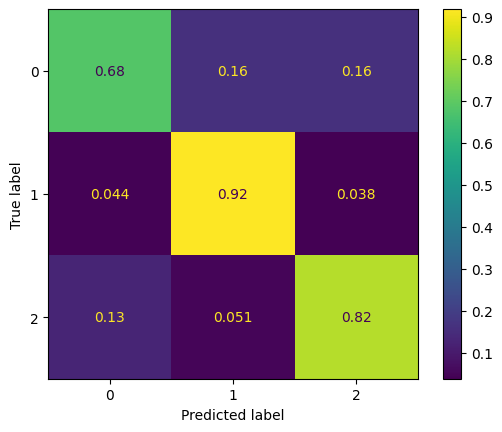

In [ ]:
# Split Data for the model

X = final_df.drop('tfopwg_disp', axis=1)
y = final_df['tfopwg_disp']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = y)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = (sc.transform(X_train))
X_test_std = (sc.transform(X_test))

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=600,
                                criterion='log_loss',
                                max_features='sqrt',
                                max_depth=60,
                                min_samples_leaf = 6,
                                min_samples_split = 10,
                                max_samples = 0.9,
                                oob_score = True,
                                class_weight = 'balanced',
                                )      
                      
forest.fit(X_train_std, y_train)
print('Train Accuracy : %.5f' % forest.score(X_train_std, y_train))
print('Test Accuracy : %.5f' % forest.score(X_test_std, y_test))

y_pred = forest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')

Train_Accuracy = forest.score(X_train_std, y_train)
Test_Accuracy = forest.score(X_test_std, y_test)

from sklearn.metrics import confusion_matrix
r = confusion_matrix(y_test, y_pred, normalize='true').diagonal(); print(f"Balanced accuracy = {r.mean():.3f} = ({' + '.join(f'{x:.2f}' for x in r)})/{r.size}")

Overfiting_gap = Train_Accuracy - Test_Accuracy
print(f'Overfiting gap: {Overfiting_gap}')
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()